In [22]:
# Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
# Data loading , feature selection
data = load_iris()
df_ = data.data
df = df_ [: ,1:3]
df

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

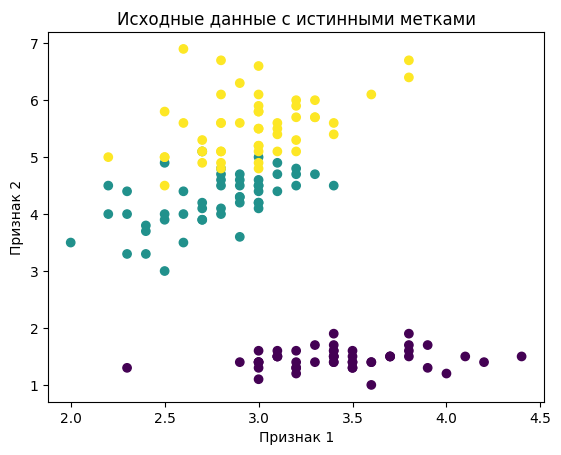

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df[:, 0], df[:, 1], c=data.target, cmap='viridis')
plt.title("Исходные данные с истинными метками")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [15]:
# Clustering
agg_clustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels_agg = agg_clustering.fit_predict(df)

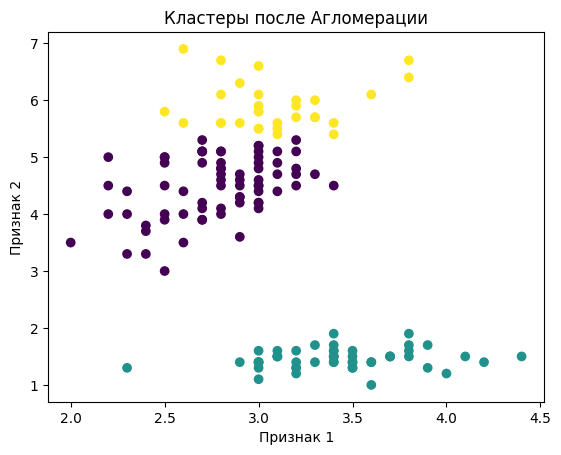

In [16]:
plt.scatter(df[:, 0], df[:, 1], c=labels_agg, cmap='viridis')
plt.title("Кластеры после Агломерации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
db = DBSCAN(eps=0.741, min_samples=5)
labels_db = db.fit_predict(df)
silhouette = silhouette_score(df, labels_db)
silhouette

0.741004899858999

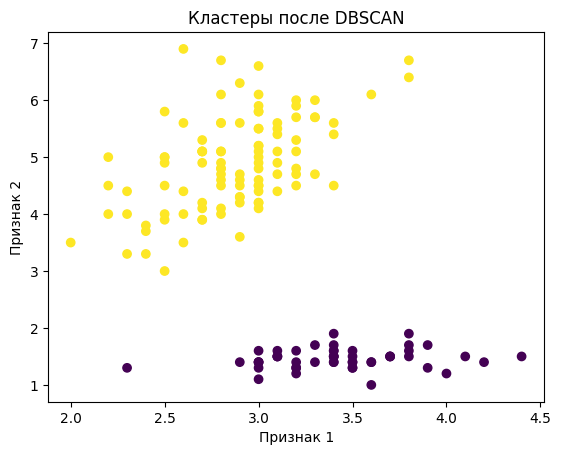

In [45]:
plt.scatter(df[:, 0], df[:, 1], c=labels_db, cmap='viridis')
plt.title("Кластеры после DBSCAN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

Далее будут представлены оценки алгоритма кластеризации методом **Агломерации** и **DBSCAN**

In [46]:
X = df #изначальные объекты
l_0 = data.target #исходные метки классов (для внешних метрик)
l_1_agg = labels_agg #полученные метки кластеров для агломерации
l_1_db = labels_db #полученные метки кластеров для DBSCAN

Индекс Рэнда оценивает, сколько пар элементов из одного класса и пар элементов из разных классов, сохранили это состояние после кластеризации
алгоритмом, то есть процент правильных решений, принятых алгоритмом.
Значение 1 означает полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений.

In [47]:
from sklearn.metrics import rand_score
rand_score(l_0 , l_1_agg), rand_score(l_0 , l_1_db)

(0.8568232662192393, 0.7762863534675615)

Индекс Жаккара похож на предыдущий индекс Rand, но не учитывает пары элементов находящиеся в разные классах и разных кластерах (TN).
Как и для индекса Rand значение 1 означает полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений.

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(l_0 , l_1_agg , average=None), jaccard_score(l_0 , l_1_db , average=None)

(array([0. , 0. , 0.6]), array([1. , 0.5, 0. ]))

Индекс Фоулкса – Мэллоуза используется для определения сходства между двумя кластерами.
Более высокое значение индекса означает большее сходство между кластерами

In [49]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(l_0 , l_1_agg), fowlkes_mallows_score(l_0 , l_1_db)

(0.7946074670353508, 0.7714542762891773)

Определяет среднюю схожесть между каждым кластером и кластером наиболее ему близким.
Чем значение меньше, тем оно лучше

In [51]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, l_1_agg), davies_bouldin_score(X, l_1_db)

(0.5434007635737985, 0.3131868669183711)